# Python for Machine Learning

### *Session \#5*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from yellowbrick.model_selection import ValidationCurve
import pandas as pd
df = pd.read_csv("heart_attack.csv")

X = df.drop('heart_attack', 1)
y = df['heart_attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Warm Ups

*Type the given code into the cell below*

---
**Create a decision tree:** 
```python
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
```

**Print tree:** `plot_tree()`

**Print path to decision:** `model.decision_path()`

**Show Gini importance of features:** `model.feature_importances_`

### Exercises
---

**1. As usual, you can use** `.score(X_test, y_test)` **to find the accuracy of the model.**

**What is the score of the model above? What is the score when you remove the** `max_depth`?

**2. Which features were most important to the decision tree?**

**You can make this easy to read by passing** `pd.DataFrame()` **the values:** `model.feature_importances()` **and then the column names:** `X_train.columns`

**3. Use a validation curve to find where** `max_depth` **begins to become ineffective. Use** `score='recall'` **to track the true positive rate**

In [ ]:
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=range(1, 4), cv=6, score='recall'
)

viz.fit(X_train, y_train)
viz.finalize()

## II. Random Forest

### Warm Ups

*Type the given code into the cell below*

---

In [6]:
from sklearn.ensemble import RandomForestClassifier

**Create a random forest**: `model = RandomForestClassifier(n_estimators=100)`

**Access estimators:** `model.estimators_`

**Feature importance:** `model.feature_importances_`

### Exercises
---

**1. Try varying the** `max_features` **and** `n_estimators` **parameters. Lowering** `max_features` **creates more diverse trees and raising** `n_estimators` **will produce more predictable outcomes**

**2. Redo the validation curve exercise with your RandomForest classifier. How does it perform with deeper trees?**

**3. The** `class_weight` **parameter takes a dictionary of classes, and changes how important each class is to the model**

**Try setting it to** `{1: 2}` **to make the positive cases twice as important. How does the model sensitivity look now?**

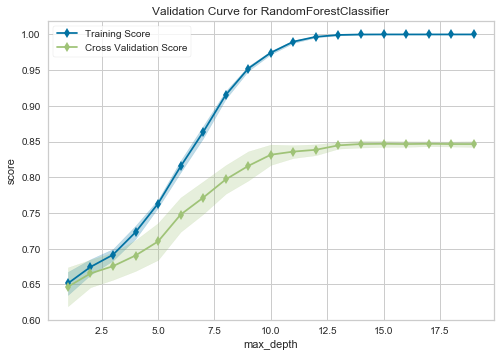

In [116]:
viz = ValidationCurve(
    RandomForestClassifier(300, class_weight={1: 6}), param_name="max_depth",
    param_range=range(1, 20), cv=6, score='accuracy'
)

viz.fit(X_train, y_train)
viz.finalize()